@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to predict y as per x
        using `Simple Linear Regression`<br>

<br>**Importing Libraries**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<br>**Importing Dataset**

In [47]:
train_df = pd.read_csv('simple-linear-regression/train.csv')
test_df = pd.read_csv('simple-linear-regression/test.csv')
display(train_df.head())

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<br>**Structure and Stats of the dataset**

In [48]:
train_df.info()
print("\nStats for the dataset are:")
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB

Stats for the dataset are:


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


<br>**Visualize the relationship between x and y**

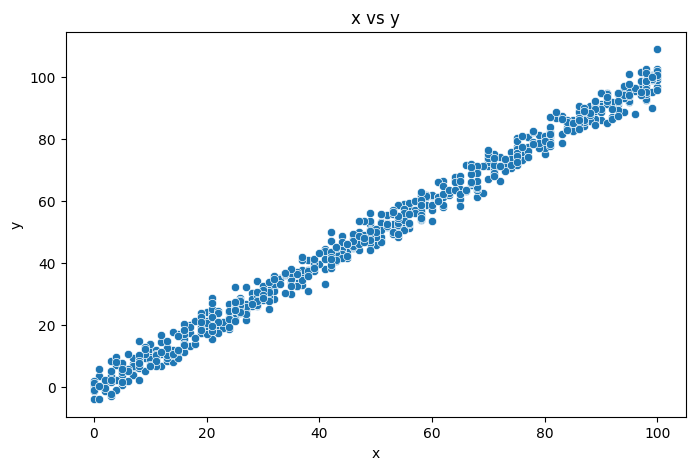

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='y', data=train_df)
plt.title('x vs y')
plt.show()

<br>**Check Correlation**

In [50]:
correlation = train_df.corr()
print(correlation)

         x        y
x  1.00000  0.99534
y  0.99534  1.00000


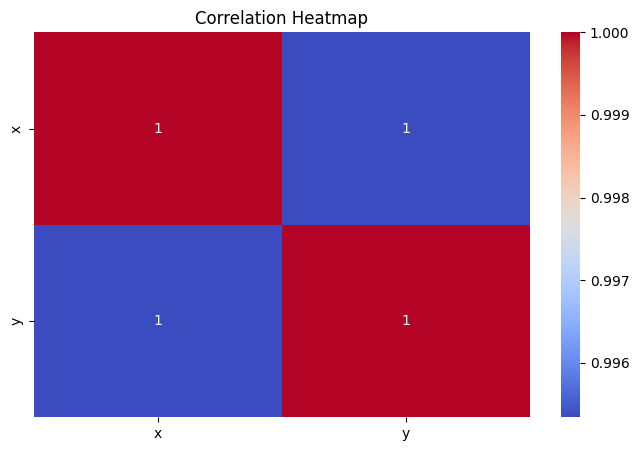

In [51]:
# Heatmap to check correlation
plt.figure(figsize=(8, 5))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


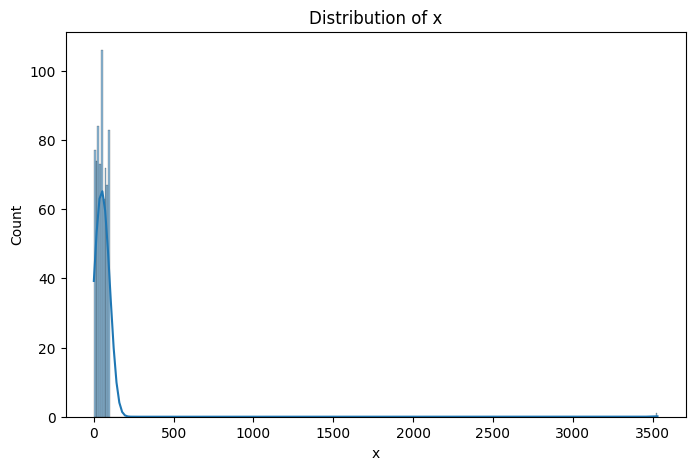

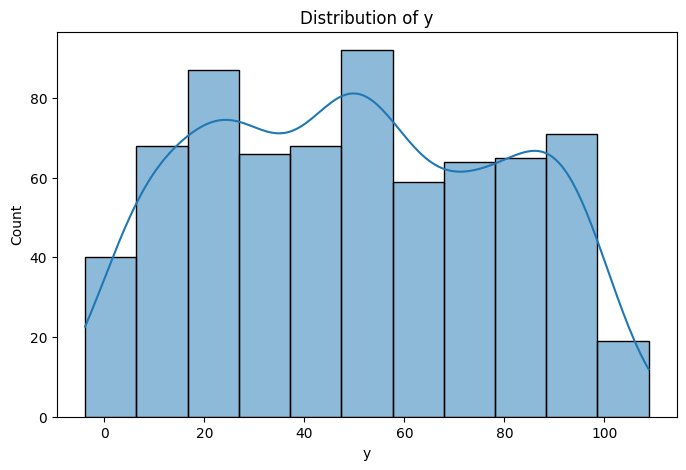

In [52]:
# Histogram of x
plt.figure(figsize=(8, 5))
sns.histplot(train_df['x'], kde=True)
plt.title('Distribution of x')
plt.show()

# Histogram of y
plt.figure(figsize=(8, 5))
sns.histplot(train_df['y'], kde=True)
plt.title('Distribution of y')
plt.show()

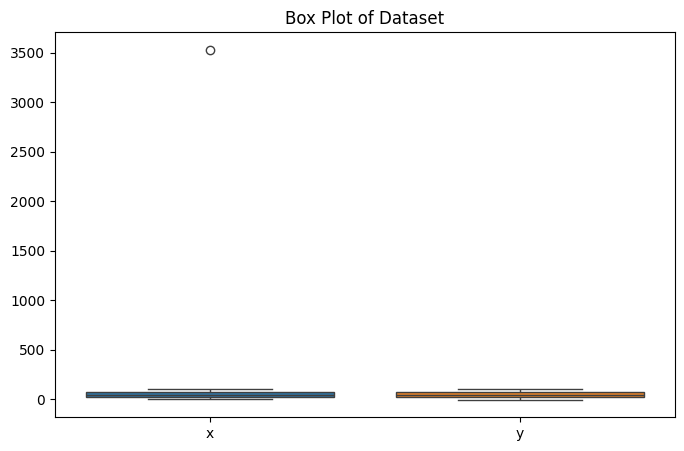

In [53]:
# Box plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data = train_df)
plt.title('Box Plot of Dataset')
plt.show()

**Handling Missing Values**

In [54]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [55]:
train_df = train_df.dropna()

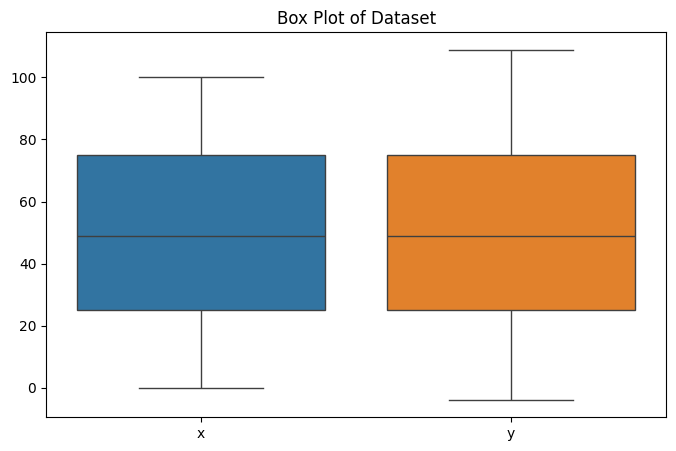

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = train_df)
plt.title('Box Plot of Dataset')
plt.show()

<br>**Splitting the Data into Train and Test sets**

In [57]:
X = train_df[['x']]
y = train_df[['y']]

<br>**Scale the feature (YearsExperience) and target (Salary)**

In [58]:
scaler = StandardScaler()

In [59]:
X_scaled = scaler.fit_transform(X)

<br>**Fit the linear regression model**

In [60]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

<br>**Make Prediction**

In [61]:
X_test = test_df[['x']]
y_test = test_df[['y']]

In [62]:
X_test = scaler.transform(X_test)

In [63]:
y_pred = model.predict(X_test)

<br>**Accuracy Metrics**

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Square: {r2}')


Mean Squared Error: 9.432922192039317
Root Mean Squared Error: 3.0713062680298293
R Square: 0.9888014444327563


<br>**Inverse transform the predicted salaries back to original scale**

In [66]:
X_test = scaler.inverse_transform(X_test)

<br>**Plotting the original data and the regression line**

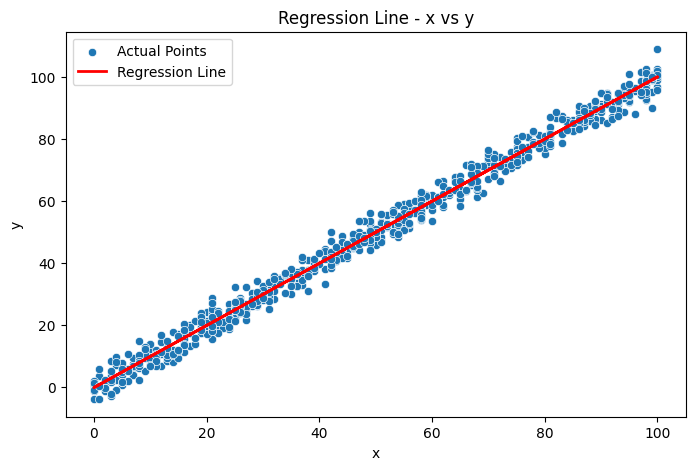

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='x', y='y', data=train_df, label = 'Actual Points')
 
# plt.scatter(x = X_test, y=y_test_orignal)
plt.plot(X_test, y_pred, color='red', linewidth=2, label = "Regression Line")
plt.title('Regression Line - x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()